In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')

import kneed

from scipy import stats
from scipy.stats import norm, skew #for some statistics

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

import warnings
warnings.filterwarnings('ignore')

In [3]:
df_schools = pd.read_csv("education_analytics/Masterlist of Schools.csv", index_col="school.id")

df_location = pd.read_csv("education_analytics/Schools Location Data.csv", 
                          encoding = "latin-1", 
                          index_col="School ID",
                          usecols=["School ID", "Enrolment", "Latitude", "Longitude"])

df_rooms = pd.read_csv('education_analytics/Rooms data.csv', index_col="School ID")

df_teachers = pd.read_csv("education_analytics/Teachers data.csv", index_col="school.id")

df_elementary = pd.read_csv("education_analytics/Enrollment Master Data_2015_E.csv")[:-1].astype(int).set_index("School ID")

df_secondary = (pd.read_csv('education_analytics/Enrollment Master Data_2015_S.csv')[:-1]
                  .replace(",", "", regex=True)
                  .astype(int)
                  .rename(columns = {'SPED NG Male':'SPED NG Male SS', 'SPED NG Female' :'SPED NG Female SS'})
                  .set_index("School ID"))

df_mooe = (pd.read_csv('education_analytics/MOOE data.csv', index_col="school.id", usecols=["school.id", " school.mooe "])
             .replace(",", "", regex=True).astype(float))

In [4]:
df_all = pd.concat([df_schools, df_location, df_rooms, df_teachers, df_elementary, df_secondary, df_mooe], axis=1)

df_all.head()

,school.name,school.region,school.region.name,school.province,school.cityhall,school.division,school.citymuni,school.district,school.legdistrict,school.type,school.abbrev,school.previousname,school.mother.id,school.address,school.established,school.classification,school.classification2,school.curricularclass,school.organization,school.cityincome,school.cityclass,school.urban,Enrolment,Latitude,Longitude,rooms.standard.academic,rooms.standard.unused,rooms.nonstandard.academic,rooms.nonstandard.unused,teachers.instructor,teachers.mobile,teachers.regular,teachers.sped,Kinder Male,Kinder Female,Grade 1 Male,Grade 1 Female,Grade 2 Male,Grade 2 Female,Grade 3 Male,Grade 3 Female,Grade 4 Male,Grade 4 Female,Grade 5 Male,Grade 5 Female,Grade 6 Male,Grade 6 Female,SPED NG Male,SPED NG Female,Grade 7 Male,Grade 7 Female,Grade 8 Male,Grade 8 Female,Grade 9 Male,Grade 9 Female,Grade 10 Male,Grade 10 Female,Grade 11 Male,Grade 11 Female,Grade 12 Male,Grade 12 Female,SPED NG Male SS,SPED NG Female SS,school.mooe
100001,Apaleng-Libtong ES,Region I,Ilocos Region,ILOCOS NORTE,ILOCOS NORTE,Ilocos Norte,BACARRA,Bacarra I,1st District,School with no Annexes,NaN,Apaleng-Libtong PS,100001.0,-,1/1/1996,Elementary,DepED Managed,Kinder & Elementary,Combined Monograde and Multigrade,P 35 M or more but less than P 45 M,NaN,Partially Urban,90.0,18.253666,120.606180,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,9.0,7.0,7.0,2.0,7.0,7.0,9.0,5.0,7.0,5.0,3.0,2.0,14.0,6.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84000.0
100002,Bacarra CES,Region I,Ilocos Region,ILOCOS NORTE,ILOCOS NORTE,Ilocos Norte,BACARRA,Bacarra I,1st District,School with no Annexes,NaN,-,100002.0,Santa Rita,1/1/1914,Elementary,DepED Managed,Elementary,Monograde,P 35 M or more but less than P 45 M,NaN,Partially Urban,456.0,18.250964,120.608958,12.0,0.0,0.0,0.0,0.0,6.0,11.0,0.0,41.0,25.0,38.0,33.0,41.0,40.0,28.0,31.0,38.0,30.0,26.0,31.0,22.0,32.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,268000.0
100003,Buyon ES,Region I,Ilocos Region,ILOCOS NORTE,ILOCOS NORTE,Ilocos Norte,BACARRA,Bacarra I,1st District,School with no Annexes,NaN,-,100003.0,NONE,1/1/1947,Elementary,DepED Managed,Elementary,Monograde,P 35 M or more but less than P 45 M,NaN,Partially Urban,167.0,18.234599,120.616037,6.0,0.0,0.0,0.0,0.0,1.0,6.0,0.0,8.0,10.0,13.0,15.0,13.0,13.0,16.0,16.0,14.0,11.0,9.0,12.0,12.0,5.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,135000.0
100004,Ganagan ES,Region I,Ilocos Region,ILOCOS NORTE,ILOCOS NORTE,Ilocos Norte,BACARRA,Bacarra I,1st District,School with no Annexes,NaN,NaN,100004.0,NONE,1/1/1949,Elementary,DepED Managed,Elementary,Monograde,P 35 M or more but less than P 45 M,NaN,Partially Urban,122.0,18.250014,120.587169,6.0,0.0,0.0,0.0,0.0,1.0,6.0,0.0,8.0,4.0,9.0,12.0,12.0,10.0,10.0,5.0,14.0,11.0,5.0,7.0,10.0,5.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,116000.0
100005,Macupit ES,Region I,Ilocos Region,ILOCOS NORTE,ILOCOS NORTE,Ilocos Norte,BACARRA,Bacarra I,1st District,School with no Annexes,NaN,-,100005.0,Macupit,1/1/1913,Elementary,DepED Managed,Elementary,Monograde,P 35 M or more but less than P 45 M,NaN,Partially Urban,77.0,18.293994,120.641019,6.0,0.0,0.0,0.0,0.0,1.0,6.0,0.0,4.0,2.0,5.0,7.0,4.0,6.0,3.0,8.0,11.0,5.0,7.0,4.0,3.0,8.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,115000.0


In [5]:
df_secondary = (pd.read_csv('Enrollment Master Data_2015_S.csv')[:-1]
                  .replace(",", "", regex=True)
                  .astype(int)
                  .rename(columns = {'SPED NG Male':'SPED NG Male SS', 'SPED NG Female' :'SPED NG Female SS'})
                  .set_index("School ID"))

df_secondary.head()

FileNotFoundError: [Errno 2] No such file or directory: 'Enrollment Master Data_2015_S.csv'

In [6]:
df_all.isna().sum()

school.name                     148
school.region                   148
school.region.name              148
school.province                 148
school.cityhall                 149
school.division                 148
school.citymuni                 148
school.district                 148
school.legdistrict              148
school.type                     148
school.abbrev                 28584
school.previousname            4530
school.mother.id                155
school.address                 2130
school.established              157
school.classification           148
school.classification2          148
school.curricularclass          148
school.organization             148
school.cityincome              1124
school.cityclass              38538
school.urban                    151
Enrolment                       127
Latitude                        130
Longitude                       130
rooms.standard.academic         339
rooms.standard.unused           339
rooms.nonstandard.academic  

In [7]:
df_all[df_all.index.duplicated(keep=False)]

,school.name,school.region,school.region.name,school.province,school.cityhall,school.division,school.citymuni,school.district,school.legdistrict,school.type,school.abbrev,school.previousname,school.mother.id,school.address,school.established,school.classification,school.classification2,school.curricularclass,school.organization,school.cityincome,school.cityclass,school.urban,Enrolment,Latitude,Longitude,rooms.standard.academic,rooms.standard.unused,rooms.nonstandard.academic,rooms.nonstandard.unused,teachers.instructor,teachers.mobile,teachers.regular,teachers.sped,Kinder Male,Kinder Female,Grade 1 Male,Grade 1 Female,Grade 2 Male,Grade 2 Female,Grade 3 Male,Grade 3 Female,Grade 4 Male,Grade 4 Female,Grade 5 Male,Grade 5 Female,Grade 6 Male,Grade 6 Female,SPED NG Male,SPED NG Female,Grade 7 Male,Grade 7 Female,Grade 8 Male,Grade 8 Female,Grade 9 Male,Grade 9 Female,Grade 10 Male,Grade 10 Female,Grade 11 Male,Grade 11 Female,Grade 12 Male,Grade 12 Female,SPED NG Male SS,SPED NG Female SS,school.mooe


In [8]:
df_all.columns

Index(['school.name', 'school.region', 'school.region.name', 'school.province',
       'school.cityhall', 'school.division', 'school.citymuni',
       'school.district', 'school.legdistrict', 'school.type', 'school.abbrev',
       'school.previousname', 'school.mother.id', 'school.address',
       'school.established', 'school.classification', 'school.classification2',
       'school.curricularclass', 'school.organization', 'school.cityincome',
       'school.cityclass', 'school.urban', 'Enrolment', 'Latitude',
       'Longitude', 'rooms.standard.academic', 'rooms.standard.unused',
       'rooms.nonstandard.academic', 'rooms.nonstandard.unused',
       'teachers.instructor', 'teachers.mobile', 'teachers.regular',
       'teachers.sped', 'Kinder Male', 'Kinder Female', 'Grade 1 Male',
       'Grade 1 Female', 'Grade 2 Male', 'Grade 2 Female', 'Grade 3 Male',
       'Grade 3 Female', 'Grade 4 Male', 'Grade 4 Female', 'Grade 5 Male',
       'Grade 5 Female', 'Grade 6 Male', 'Grade 6 Femal

In [9]:
df_all['Total Elementary SPED Students'] = df_all['SPED NG Male'] + df_all['SPED NG Female']
df_all['Total Secondary SPED Students'] = df_all['SPED NG Male SS'] + df_all['SPED NG Female SS']
df_all['Total Rooms'] = (df_all['rooms.standard.academic'] + 
                             df_all['rooms.standard.unused'] + 
                             df_all['rooms.nonstandard.academic'] + 
                             df_all['rooms.nonstandard.unused'])
df_all['Other Teachers'] = (df_all['teachers.instructor'] + 
                             df_all['teachers.mobile'] + 
                             df_all['teachers.regular'])
                            
df_all['SPED Teachers'] = df_all['teachers.sped']

df_all['Total Teachers'] = df_all['Other Teachers'] + df_all['SPED Teachers']

df_all['ST Ratio'] = df_all['Enrolment'] / df_all['Total Teachers']

df_all['Students per Room Ratio'] = df_all['Enrolment']/df_all['Total Rooms']

df_all['MOOE per Student Ratio'] = df_all[' school.mooe ']/df_all['Enrolment']

In [10]:
df_eda = df_all[['school.region','school.classification','ST Ratio','Students per Room Ratio','MOOE per Student Ratio']]

In [11]:
df_eda

,school.region,school.classification,ST Ratio,Students per Room Ratio,MOOE per Student Ratio
100001,Region I,Elementary,45.000000,45.000000,933.333333
100002,Region I,Elementary,26.823529,38.000000,587.719298
100003,Region I,Elementary,23.857143,27.833333,808.383234
100004,Region I,Elementary,17.428571,20.333333,950.819672
100005,Region I,Elementary,11.000000,12.833333,1493.506494
...,...,...,...,...,...
326101,Region XII,Secondary,NaN,131.000000,664.122137
326102,Region XII,Secondary,NaN,95.500000,753.926702
326501,ARMM,Secondary,inf,NaN,NaN
356059,Region VII,Secondary,NaN,45.333333,1301.470588


In [12]:
df_eda.replace([np.inf, -np.inf], np.nan, inplace=True)

In [13]:
df_eda_missing = (df_eda.isnull().sum() / len(df_eda))*100
df_eda_missing = df_eda_missing.drop(df_eda_missing[df_eda_missing == 0].index).sort_values(ascending = False)
missing_data = pd.DataFrame({'Missing Percentage':df_eda_missing})
missing_data

,Missing Percentage
MOOE per Student Ratio,5.828752
ST Ratio,5.610575
Students per Room Ratio,1.629912
school.region,0.316571
school.classification,0.316571


In [14]:
df_eda_copy = df_eda

In [15]:
df_eda_copy.head()

,school.region,school.classification,ST Ratio,Students per Room Ratio,MOOE per Student Ratio
100001,Region I,Elementary,45.000000,45.000000,933.333333
100002,Region I,Elementary,26.823529,38.000000,587.719298
100003,Region I,Elementary,23.857143,27.833333,808.383234
100004,Region I,Elementary,17.428571,20.333333,950.819672
100005,Region I,Elementary,11.000000,12.833333,1493.506494


In [16]:
#ARMM MOOE contains no values. This is to keep ARMM data for ST Ratio and Students per Room.

df_eda_elem = (df_eda_copy[df_eda_copy['school.classification']=='Elementary']
                [['school.region','ST Ratio','Students per Room Ratio','MOOE per Student Ratio']])

df_eda_second = (df_eda_copy[df_eda_copy['school.classification']=='Secondary']
                [['school.region','ST Ratio','Students per Room Ratio','MOOE per Student Ratio']])

In [17]:
df_clean = df_eda_copy.dropna()
df_clean.shape

(41715, 5)

In [18]:
dropped_rows = df_eda.shape[0] - df_clean.shape[0]
dropped_rows

5036

In [19]:
df_clean.columns

Index(['school.region', 'school.classification', 'ST Ratio',
       'Students per Room Ratio', 'MOOE per Student Ratio'],
      dtype='object')

In [20]:
df_elementary = df_clean[df_clean['school.classification']=='Elementary']
df_secondary =  df_clean[df_clean['school.classification']=='Secondary']

In [21]:
df_elementary.describe()

,ST Ratio,Students per Room Ratio,MOOE per Student Ratio
count,35848.000000,35848.000000,35848.000000
mean,39.077400,42.028480,761.349897
std,15.747170,22.723777,514.460557
min,1.600000,1.600000,172.376874
25%,29.551974,29.307692,518.950437
50%,37.333333,38.111111,628.712871
75%,45.728788,48.500000,815.789474
max,496.000000,591.285714,18666.666667


In [22]:
df_secondary.describe()

,ST Ratio,Students per Room Ratio,MOOE per Student Ratio
count,5867.000000,5867.000000,5867.000000
mean,36.691031,55.027607,1226.481548
std,34.939249,26.652215,937.477651
min,0.875000,1.400000,561.704483
25%,25.878676,40.833333,959.919679
50%,32.388889,49.800000,1101.694915
75%,39.500000,61.312500,1316.091995
max,1570.000000,702.000000,39857.142857


# Exploratory Data Analysis

In [23]:
df_elementary_grouped = (df_eda_elem.groupby(['school.region'])
                ['Students per Room Ratio','ST Ratio','MOOE per Student Ratio'].mean().reset_index())

df_elementary_grouped2 = (df_elementary.groupby(['school.region'])
                ['Students per Room Ratio','ST Ratio','MOOE per Student Ratio'].mean().reset_index())

In [24]:
df_secondary_grouped = (df_eda_second.groupby(['school.region'])
                ['Students per Room Ratio','ST Ratio','MOOE per Student Ratio'].mean().reset_index())

df_secondary_grouped2 = (df_secondary.groupby(['school.region'])
                ['Students per Room Ratio','ST Ratio','MOOE per Student Ratio'].mean().reset_index())

# Elementary EDA

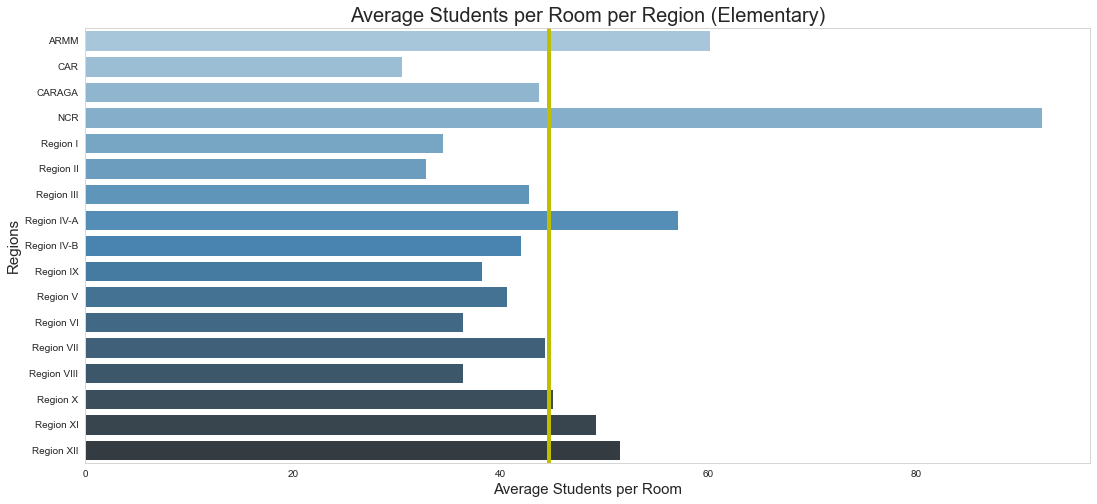

In [182]:
# indicates if plotting on the figues or on subplots
plt.figure(figsize=(18,8)) ## size of the figure

# the main code to create the graph
sns.barplot(x=df_elementary_grouped['Students per Room Ratio'], y=df_elementary_grouped['school.region'],
            data=df_elementary_grouped, palette = 'Blues_d')

# additional elements that can be customzed
plt.title("Average Students per Room per Region (Elementary)", fontsize=20)
plt.ylabel("Regions", fontsize=15)
plt.xlabel("Average Students per Room", fontsize=15)

plt.axvline(df_elementary_grouped2['Students per Room Ratio'].mean(), linewidth=4, color='y')

# display graph
plt.show()

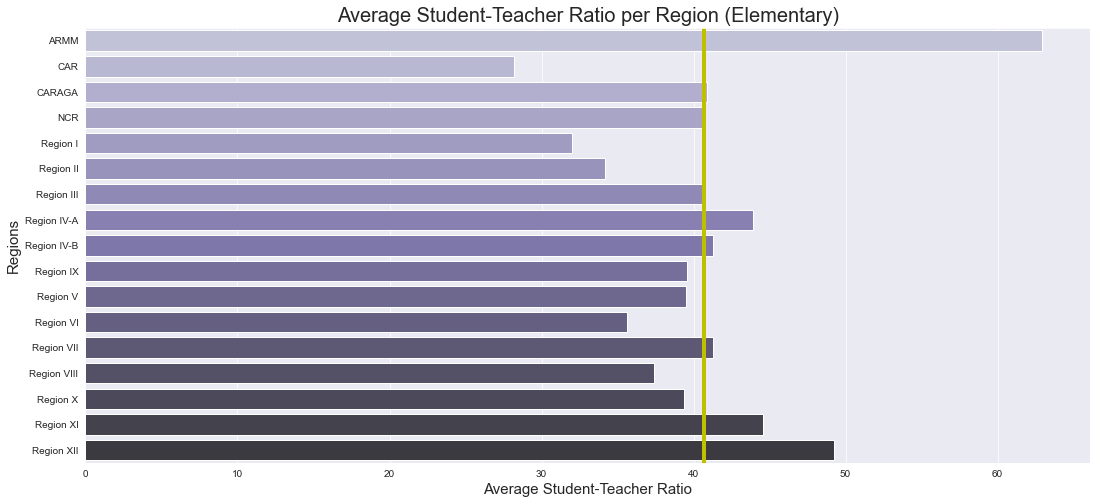

In [29]:
# indicates if plotting on the figues or on subplots
plt.figure(figsize=(18,8)) ## size of the figure

# the main code to create the graph
sns.barplot(x=df_elementary_grouped['ST Ratio'], y=df_elementary_grouped['school.region'],
            data=df_elementary_grouped, palette = 'Purples_d')

# additional elements that can be customzed
plt.title("Average Student-Teacher Ratio per Region (Elementary)", fontsize=20)
plt.ylabel("Regions", fontsize=15)
plt.xlabel("Average Student-Teacher Ratio", fontsize=15)

plt.axvline(df_elementary_grouped['ST Ratio'].mean(), linewidth=4, color='y')

# display graph
plt.show()

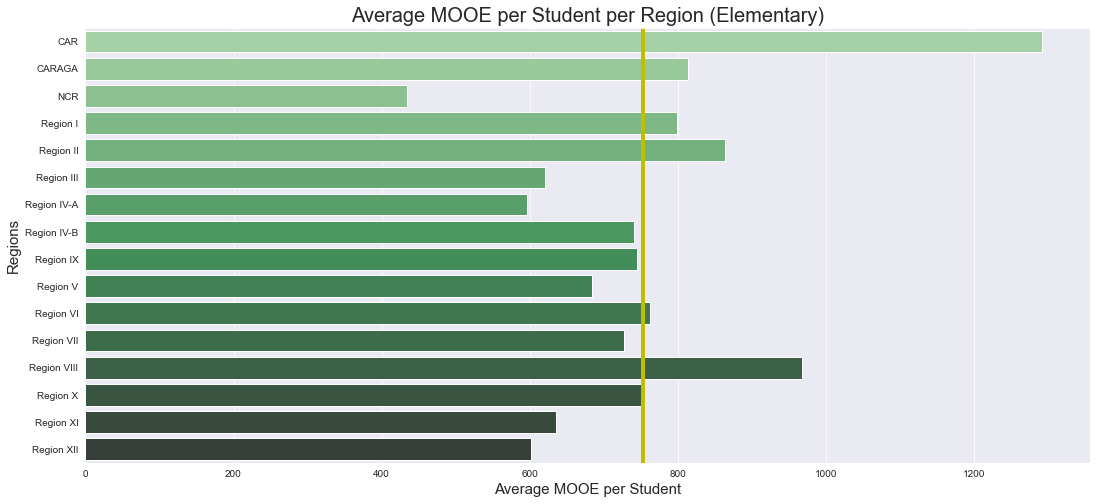

In [30]:
## Regions with Most Number of Used Rooms for Secondary

# indicates if plotting on the figues or on subplots
plt.figure(figsize=(18,8)) ## size of the figure

sns.barplot(x=df_elementary_grouped2['MOOE per Student Ratio'], y=df_elementary_grouped2['school.region'],
            data=df_elementary_grouped2, palette = 'Greens_d')

# additional elements that can be customzed
plt.title("Average MOOE per Student per Region (Elementary)", fontsize=20)
plt.ylabel("Regions", fontsize=15)
plt.xlabel("Average MOOE per Student", fontsize=15)

plt.axvline(df_elementary_grouped2['MOOE per Student Ratio'].mean(), linewidth=4, color='y')

# display graph
plt.show()

# Secondary EDA

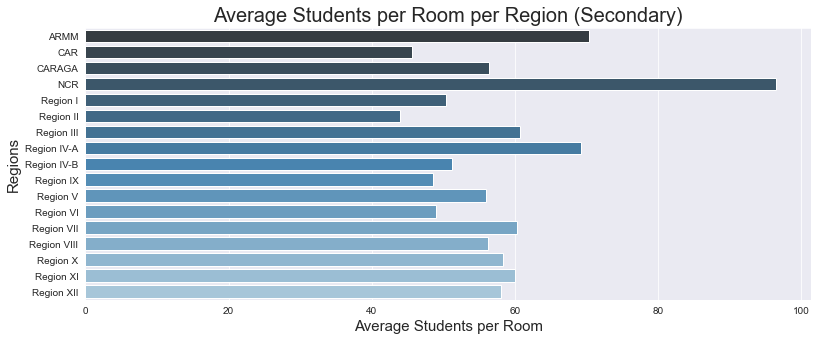

In [27]:
# indicates if plotting on the figues or on subplots
plt.figure(figsize=(13,5)) ## size of the figure

# the main code to create the graph
sns.barplot(x=df_secondary_grouped['Students per Room Ratio'], y=df_secondary_grouped['school.region'],
            data=df_secondary_grouped, palette = 'Blues_d')

# additional elements that can be customzed
plt.title("Average Students per Room per Region (Secondary)", fontsize=20)
plt.ylabel("Regions", fontsize=15)
plt.xlabel("Average Students per Room", fontsize=15)

# display graph
plt.show()

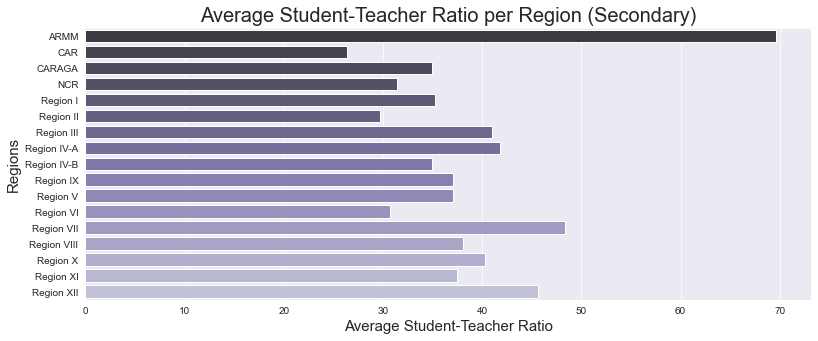

In [28]:
# indicates if plotting on the figues or on subplots
plt.figure(figsize=(13,5)) ## size of the figure

# the main code to create the graph
sns.barplot(x=df_secondary_grouped['ST Ratio'], y=df_secondary_grouped['school.region'],
            data=df_secondary_grouped, palette = 'Purples_d')

# additional elements that can be customzed
plt.title("Average Student-Teacher Ratio per Region (Secondary)", fontsize=20)
plt.ylabel("Regions", fontsize=15)
plt.xlabel("Average Student-Teacher Ratio", fontsize=15)

# display graph
plt.show()

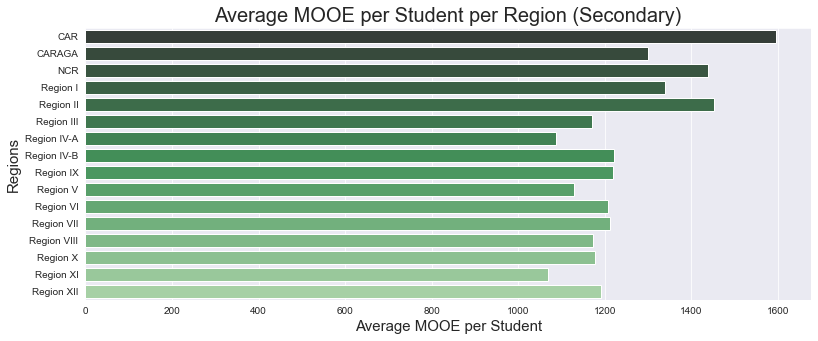

In [29]:
## Regions with Most Number of Used Rooms for Secondary

# indicates if plotting on the figues or on subplots
plt.figure(figsize=(13,5)) ## size of the figure

sns.barplot(x=df_secondary_grouped2['MOOE per Student Ratio'], y=df_secondary_grouped2['school.region'],
            data=df_secondary_grouped2, palette = 'Greens_d')

# additional elements that can be customzed
plt.title("Average MOOE per Student per Region (Secondary)", fontsize=20)
plt.ylabel("Regions", fontsize=15)
plt.xlabel("Average MOOE per Student", fontsize=15)

# display graph
plt.show()

# Clustering

In [61]:
df_elementary.columns

Index(['school.region', 'school.classification', 'ST Ratio',
       'Students per Room Ratio', 'MOOE per Student Ratio'],
      dtype='object')

In [62]:
df_elementary_kmeans = df_elementary[['ST Ratio','Students per Room Ratio','MOOE per Student Ratio']]
df_secondary_kmeans = df_secondary[['ST Ratio','Students per Room Ratio','MOOE per Student Ratio']]

In [63]:
df_elementary_kmeans.shape

(35848, 3)

### Elementary Data

In [64]:
df_elementary_kmeans.head()

,ST Ratio,Students per Room Ratio,MOOE per Student Ratio
100001,45.000000,45.000000,933.333333
100002,26.823529,38.000000,587.719298
100003,23.857143,27.833333,808.383234
100004,17.428571,20.333333,950.819672
100005,11.000000,12.833333,1493.506494


<AxesSubplot:xlabel='variable', ylabel='value'>

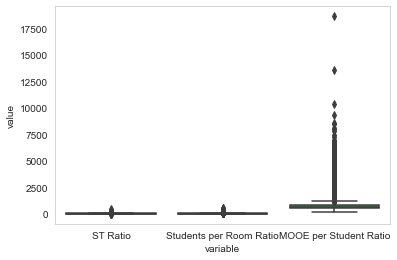

In [65]:
melted = df_elementary_kmeans.melt()

sns.boxplot(melted.variable, melted.value)

In [66]:
#Remove MOOE outliers

Q1 = df_elementary_kmeans['MOOE per Student Ratio'].quantile(0.25)
Q3 = df_elementary_kmeans['MOOE per Student Ratio'].quantile(0.75)
IQR = Q3 - Q1
df_elementary_kmeans = (df_elementary_kmeans[(df_elementary_kmeans['MOOE per Student Ratio'] >= Q1 - 1.5*IQR) & 
                           (df_elementary_kmeans['MOOE per Student Ratio'] <= Q3 + 1.5*IQR)])

In [67]:
#Remove ST Ratio outliers
Q1 = df_elementary_kmeans['ST Ratio'].quantile(0.25)
Q3 = df_elementary_kmeans['ST Ratio'].quantile(0.75)
IQR = Q3 - Q1
df_elementary_kmeans = (df_elementary_kmeans[(df_elementary_kmeans['ST Ratio'] >= Q1 - 1.5*IQR) & 
                           (df_elementary_kmeans['ST Ratio'] <= Q3 + 1.5*IQR)])

In [68]:
#Remove ST Ratio outliers
Q1 = df_elementary_kmeans['Students per Room Ratio'].quantile(0.25)
Q3 = df_elementary_kmeans['Students per Room Ratio'].quantile(0.75)
IQR = Q3 - Q1
df_elementary_kmeans = (df_elementary_kmeans[(df_elementary_kmeans['Students per Room Ratio'] >= Q1 - 1.5*IQR) & 
                           (df_elementary_kmeans['Students per Room Ratio'] <= Q3 + 1.5*IQR)])

In [69]:
df_elementary_kmeans.shape

(30437, 3)

In [70]:
from mpl_toolkits.mplot3d import Axes3D

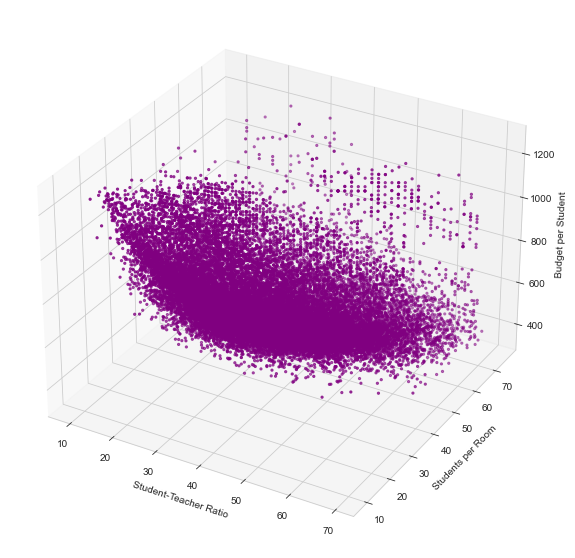

In [71]:
sns.set_style("whitegrid", {'axes.grid' : False})

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

ST_Ratio = df_elementary_kmeans['ST Ratio']
Rooms = df_elementary_kmeans['Students per Room Ratio']
Budget = df_elementary_kmeans['MOOE per Student Ratio']
ax.scatter(ST_Ratio, Rooms, Budget, s=5,c='purple')

ax.set_xlabel('Student-Teacher Ratio')
ax.set_ylabel('Students per Room')
ax.set_zlabel('Budget per Student')

plt.show()

In [72]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_elementary_kmeans_scaled = scaler.fit_transform(df_elementary_kmeans)

In [73]:
print(df_elementary_kmeans_scaled.min())
print(df_elementary_kmeans_scaled.max())

-2.736418197212506
3.1301708819437417


In [74]:
df_elementary_kmeans.shape

(30437, 3)

## K-Means

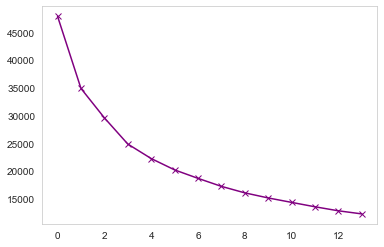

In [75]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score,silhouette_score,silhouette_samples

ssd = []
db={}

df_elementary_kmeans

range_n_clusters = list(np.arange(2,16))

for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(df_elementary_kmeans_scaled)
    
    ssd.append(kmeans.inertia_)
    db[num_clusters] = davies_bouldin_score(df_elementary_kmeans_scaled,kmeans.labels_)
   
    
# plot the SSDs for each n_clusters
plt.plot(ssd,'bx-',c='purple')

In [76]:
from kneed import *

#k-means elbow
k1 = KneeLocator(range(2,16), ssd, curve='convex', direction='decreasing')
k1.elbow

5

In [77]:
print(list(db.keys())[list(db.values()).index(min(db.values()))])

2


In [78]:
df_elementary_kmeans_scaled

array([[ 0.67266445,  0.47860707,  1.40604503],
       [-1.0600478 , -0.09758608, -0.413241  ],
       [-1.34282516, -0.93443803,  0.7483172 ],
       ...,
       [ 0.13883207,  0.01765255, -0.14017699],
       [ 2.57920867, -0.55030927, -0.13264046],
       [ 0.243692  , -1.55864728,  1.69198659]])

In [79]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(df_elementary_kmeans_scaled)
cluster_labels_1 = kmeans.predict(df_elementary_kmeans_scaled)   

df_elementary_kmeans['Cluster_Labels'] = cluster_labels_1
df_elementary_kmeans['Cluster_Labels'].value_counts()

1    9842
0    8340
4    5303
3    4630
2    2322
Name: Cluster_Labels, dtype: int64

In [80]:
df_elementary_kmeans

,ST Ratio,Students per Room Ratio,MOOE per Student Ratio,Cluster_Labels
100001,45.000000,45.000000,933.333333,2
100002,26.823529,38.000000,587.719298,0
100003,23.857143,27.833333,808.383234,3
100004,17.428571,20.333333,950.819672,3
100006,18.714286,18.714286,961.832061,3
...,...,...,...,...
238003,21.750000,39.545455,616.091954,0
239501,36.500000,29.200000,767.123288,0
250501,39.400000,39.400000,639.593909,1
259006,65.000000,32.500000,641.025641,2


## Silhouette Score 

In [81]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
range_n_clusters = list(np.arange(2,9))

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(df_elementary_kmeans_scaled)
    
    cluster_labels = kmeans.predict(df_elementary_kmeans_scaled)
    
    # silhouette score
    silhouette_avg = silhouette_score(df_elementary_kmeans_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.4020078886680675
For n_clusters=3, the silhouette score is 0.3405542472996119
For n_clusters=4, the silhouette score is 0.29022824353194465
For n_clusters=5, the silhouette score is 0.311542917556334
For n_clusters=6, the silhouette score is 0.2759450422574789
For n_clusters=7, the silhouette score is 0.28163603866028925
For n_clusters=8, the silhouette score is 0.2874319202976404


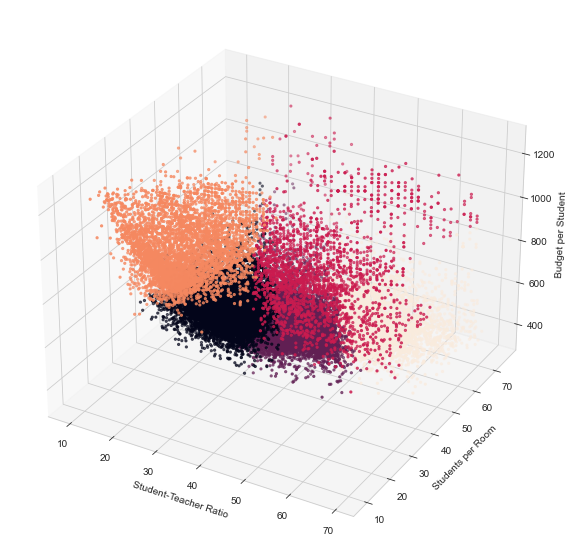

In [82]:
sns.set_style("whitegrid", {'axes.grid' : False})

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

ST_Ratio = df_elementary_kmeans['ST Ratio']
Rooms = df_elementary_kmeans['Students per Room Ratio']
Budget = df_elementary_kmeans['MOOE per Student Ratio']
Cluster = df_elementary_kmeans['Cluster_Labels']
ax.scatter(ST_Ratio, Rooms, Budget, s=5, c = Cluster)


ax.set_xlabel('Student-Teacher Ratio')
ax.set_ylabel('Students per Room')
ax.set_zlabel('Budget per Student')

plt.show()

<AxesSubplot:xlabel='Cluster_Labels', ylabel='MOOE per Student Ratio'>

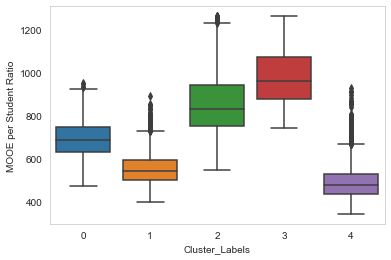

In [83]:
sns.boxplot(x=df_elementary_kmeans.Cluster_Labels, y=df_elementary_kmeans["MOOE per Student Ratio"])

<AxesSubplot:xlabel='Cluster_Labels', ylabel='ST Ratio'>

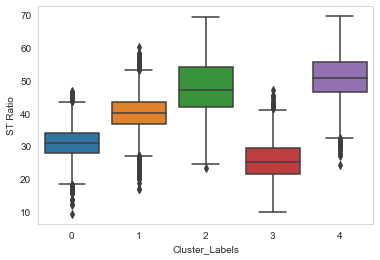

In [84]:
sns.boxplot(x=df_elementary_kmeans.Cluster_Labels, y=df_elementary_kmeans["ST Ratio"])

<AxesSubplot:xlabel='Cluster_Labels', ylabel='Students per Room Ratio'>

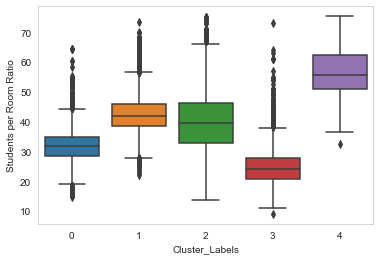

In [85]:
sns.boxplot(x=df_elementary_kmeans.Cluster_Labels, y=df_elementary_kmeans["Students per Room Ratio"])

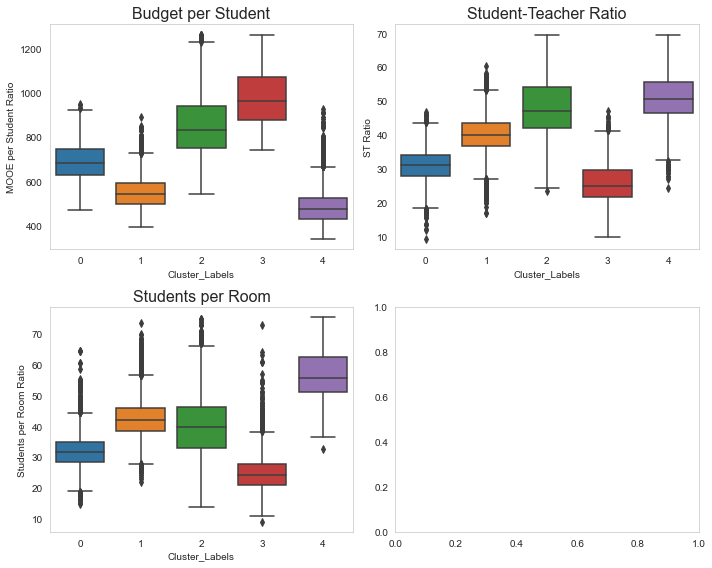

In [86]:
import seaborn as sns
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,8))

sns.boxplot(x="Cluster_Labels", y=df_elementary_kmeans["MOOE per Student Ratio"], data=df_elementary_kmeans, ax=axes[0,0])
axes[0,0].set_title("Budget per Student", fontsize=16)

sns.boxplot(x=df_elementary_kmeans.Cluster_Labels, y=df_elementary_kmeans["ST Ratio"], ax=axes[0,1])
axes[0,1].set_title("Student-Teacher Ratio", fontsize=16)

sns.boxplot(x=df_elementary_kmeans.Cluster_Labels, y=df_elementary_kmeans["Students per Room Ratio"], ax=axes[1,0])
axes[1,0].set_title("Students per Room", fontsize=16)

plt.tight_layout()
plt.show();

In [87]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_minmax = scaler.fit_transform(df_elementary_kmeans)

df_minmax = pd.DataFrame(df_minmax, index=df_elementary_kmeans.index, columns=df_elementary_kmeans.columns)

# df_minmax['Cluster_Labels'] = cluster_labels

df_clusters = df_minmax.set_index("Cluster_Labels")
df_clusters = df_clusters.groupby("Cluster_Labels").mean().reset_index()
df_clusters

,Cluster_Labels,ST Ratio,Students per Room Ratio,MOOE per Student Ratio
0,0.00,0.359681,0.341744,0.376137
1,0.25,0.511088,0.503635,0.225489
2,0.50,0.646286,0.470459,0.564753
3,0.75,0.272187,0.237155,0.695054
4,1.00,0.694656,0.723170,0.163783


In [92]:
st_mean = df_minmax['ST Ratio'].mean()
room_mean = df_minmax['Students per Room Ratio'].mean()
mooe_mean = df_minmax['MOOE per Student Ratio'].mean()

In [93]:
for index, row in df_clusters.iterrows():
    st = 'high' if row['ST Ratio'] > st_mean else 'low'
    room = 'high' if row['Students per Room Ratio'] > room_mean else 'low'
    mooe = 'high' if row['MOOE per Student Ratio'] > mooe_mean else 'low'
    print(index, st, room, mooe)

0 low low high
1 high high low
2 high high high
3 low low high
4 high high low


Ideal is Cluster 3
ST Ratio (low), Students per Room (low), MOOE (high)

Worst State is cluster 1
ST Ratio (high), Students per Room (high), MOOE (low)

In [94]:
from math import pi
def make_spider( row, title, color):
 
    # number of variable
    categories=list(df_clusters)[1:]
    N = len(categories)
 
    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
 
    # Initialise the spider plot
    ax = plt.subplot(3,3,row+1, polar=True )
 
    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 3.5)
    ax.set_theta_direction(-1)
    
    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)
 
    # Draw ylabels
    ax.set_rlabel_position(0)
#     plt.yticks([-2, -1, 0, 1, 2], [-2,-1, 0, 1, 2], color="grey", size=7) #for sscaled
#     plt.ylim(-2.5,2.5)
    plt.yticks([-0.25, 0, 0.25, 0.5, 0.75, 1], [-0.25, 0, 0.25, 0.5,0.75, 1], color="grey", size=7) #formmscaled
    plt.ylim(-0.25,1)

    # Ind1
    values=df_clusters.loc[row].drop('Cluster_Labels').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)
 
    # Add a title
    plt.title(title, size=14, color=color, y=1.1)

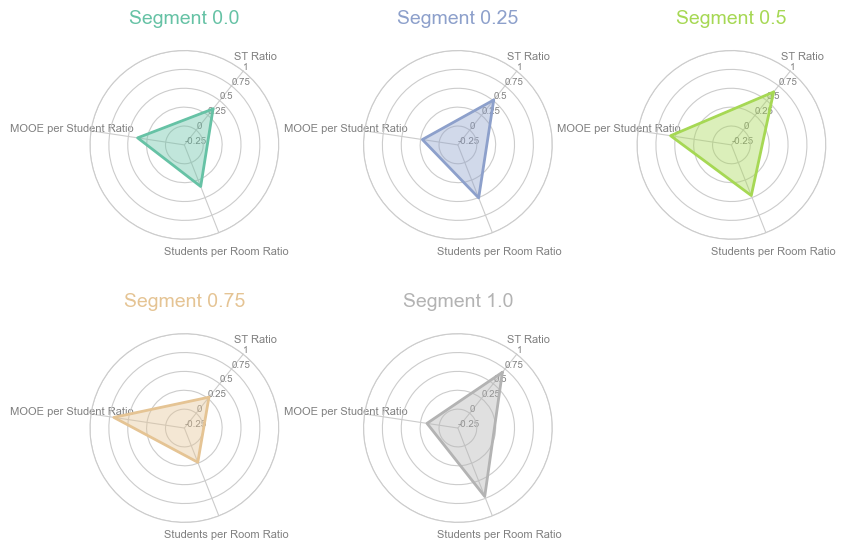

In [95]:
my_dpi=100
plt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)
plt.subplots_adjust(hspace=0.5)

# Create a color palette:
my_palette = plt.cm.get_cmap("Set2", len(df_clusters.index))

for row in range(0, len(df_clusters.index)):
    make_spider(row=row, 
                title='Segment '+(df_clusters['Cluster_Labels'][row]).astype(str), 
                color=my_palette(row))

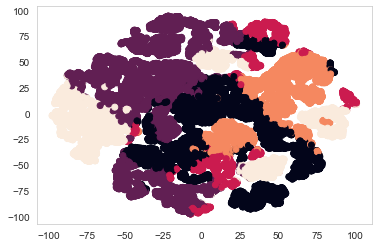

In [96]:
# t-SNE visualization of grain dataset

# Import TSNE
from sklearn.manifold import TSNE

variety_numbers = list(df_elementary_kmeans.iloc[:,-1])

# Create a TSNE instance: model
model = TSNE(learning_rate=300, perplexity=30)

# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(df_elementary_kmeans_scaled)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]

# Scatter plot, coloring by variety_numbers
plt.scatter(xs,ys,c=variety_numbers)
plt.show()

# Group regionally

In [111]:
df_elementary_kmeans

,ST Ratio,Students per Room Ratio,MOOE per Student Ratio,Cluster_Labels
100001,45.000000,45.000000,933.333333,2
100002,26.823529,38.000000,587.719298,0
100003,23.857143,27.833333,808.383234,3
100004,17.428571,20.333333,950.819672,3
100006,18.714286,18.714286,961.832061,3
...,...,...,...,...
238003,21.750000,39.545455,616.091954,0
239501,36.500000,29.200000,767.123288,0
250501,39.400000,39.400000,639.593909,1
259006,65.000000,32.500000,641.025641,2


In [130]:
df_included_schools = df_elementary.loc[list(df_elementary_kmeans.index.unique())]
df_included_schools.shape

(30437, 5)

In [112]:
df_best = df_elementary_kmeans[df_elementary_kmeans['Cluster_Labels'] == 3]
df_worst = df_elementary_kmeans[df_elementary_kmeans['Cluster_Labels'] == 1]
(df_best.shape, df_worst.shape)

((4630, 4), (9842, 4))

In [131]:
df_best_regions = df_included_schools.loc[list(df_best.index.unique())]
df_worst_regions = df_included_schools.loc[list(df_worst.index.unique())]
display(df_best_regions.head())
display(df_worst_regions.head())

,school.region,school.classification,ST Ratio,Students per Room Ratio,MOOE per Student Ratio
100003,Region I,Elementary,23.857143,27.833333,808.383234
100004,Region I,Elementary,17.428571,20.333333,950.819672
100006,Region I,Elementary,18.714286,18.714286,961.832061
100007,Region I,Elementary,23.571429,23.571429,824.242424
100008,Region I,Elementary,16.357143,19.083333,851.528384


,school.region,school.classification,ST Ratio,Students per Room Ratio,MOOE per Student Ratio
100024,Region I,Elementary,40.285714,40.285714,563.829787
100026,Region I,Elementary,31.095238,40.812500,542.113323
100029,Region I,Elementary,39.000000,43.333333,525.641026
100050,Region I,Elementary,33.333333,42.857143,583.333333
100065,Region I,Elementary,39.142857,39.142857,576.642336


In [134]:
# Get total schools per region in included schools
region_count = df_included_schools['school.region'].value_counts()
region_count

Region VI      3003
Region V       2905
Region VIII    2828
Region III     2746
Region VII     2522
Region I       2153
Region IV-A    2150
Region II      1883
Region IX      1835
Region X       1757
Region IV-B    1515
Region XI      1375
Region XII     1362
CARAGA         1273
CAR             965
NCR             165
Name: school.region, dtype: int64

In [144]:
best_region_state = dict()

temp = df_best_regions['school.region'].value_counts()

for region in temp.keys():
    best_region_state[region] = temp[region] / region_count[region]

display(best_region_state)

{'Region VIII': 0.23125884016973125,
 'Region I': 0.2266604737575476,
 'Region VI': 0.16217116217116218,
 'CAR': 0.43730569948186526,
 'Region II': 0.22039298990971853,
 'Region V': 0.11153184165232358,
 'Region VII': 0.12093576526566217,
 'Region IX': 0.1569482288828338,
 'Region X': 0.16107000569151964,
 'Region III': 0.0852148579752367,
 'Region IV-B': 0.1504950495049505,
 'CARAGA': 0.13982717989002358,
 'Region IV-A': 0.06744186046511629,
 'Region XI': 0.07563636363636364,
 'Region XII': 0.052129221732745964,
 'NCR': 0.024242424242424242}

In [145]:
worst_region_state = dict()

temp = df_worst_regions['school.region'].value_counts()

for region in temp.keys():
    worst_region_state[region] = temp[region] / region_count[region]

display(worst_region_state)

{'Region III': 0.44319009468317555,
 'Region V': 0.4103270223752151,
 'Region VI': 0.31601731601731603,
 'Region IV-A': 0.37813953488372093,
 'Region VII': 0.31007137192704204,
 'Region I': 0.29029261495587555,
 'Region VIII': 0.2188826025459689,
 'Region IX': 0.3013623978201635,
 'Region XII': 0.3957415565345081,
 'Region X': 0.29994308480364257,
 'Region XI': 0.3789090909090909,
 'Region II': 0.2464152947424323,
 'Region IV-B': 0.300990099009901,
 'CARAGA': 0.3126472898664572,
 'CAR': 0.12746113989637306,
 'NCR': 0.3878787878787879}

In [148]:
best_region_state = dict(sorted(best_region_state.items(), key=lambda item: item[1], reverse=True))
worst_region_state = dict(sorted(worst_region_state.items(), key=lambda item: item[1], reverse=True))
display(best_region_state)
display(worst_region_state)

{'CAR': 0.43730569948186526,
 'Region VIII': 0.23125884016973125,
 'Region I': 0.2266604737575476,
 'Region II': 0.22039298990971853,
 'Region VI': 0.16217116217116218,
 'Region X': 0.16107000569151964,
 'Region IX': 0.1569482288828338,
 'Region IV-B': 0.1504950495049505,
 'CARAGA': 0.13982717989002358,
 'Region VII': 0.12093576526566217,
 'Region V': 0.11153184165232358,
 'Region III': 0.0852148579752367,
 'Region XI': 0.07563636363636364,
 'Region IV-A': 0.06744186046511629,
 'Region XII': 0.052129221732745964,
 'NCR': 0.024242424242424242}

{'Region III': 0.44319009468317555,
 'Region V': 0.4103270223752151,
 'Region XII': 0.3957415565345081,
 'NCR': 0.3878787878787879,
 'Region XI': 0.3789090909090909,
 'Region IV-A': 0.37813953488372093,
 'Region VI': 0.31601731601731603,
 'CARAGA': 0.3126472898664572,
 'Region VII': 0.31007137192704204,
 'Region IX': 0.3013623978201635,
 'Region IV-B': 0.300990099009901,
 'Region X': 0.29994308480364257,
 'Region I': 0.29029261495587555,
 'Region II': 0.2464152947424323,
 'Region VIII': 0.2188826025459689,
 'CAR': 0.12746113989637306}

In [158]:
plt.barh(pd.DataFrame.from_dict(best_region_state.values(), orient='index', columns=best_region_state.keys()))

AttributeError: 'dict_values' object has no attribute 'values'

In [164]:
df_best_ratios = pd.DataFrame.from_dict(best_region_state.items())
df_best_ratios.set_index(0)

,1
0,
CAR,0.437306
Region VIII,0.231259
Region I,0.226660
Region II,0.220393
Region VI,0.162171
Region X,0.161070
Region IX,0.156948
Region IV-B,0.150495
CARAGA,0.139827


In [166]:
df_worst_ratios = pd.DataFrame.from_dict(worst_region_state.items())
df_worst_ratios.set_index(0)

,1
0,
Region III,0.443190
Region V,0.410327
Region XII,0.395742
NCR,0.387879
Region XI,0.378909
Region IV-A,0.378140
Region VI,0.316017
CARAGA,0.312647
Region VII,0.310071


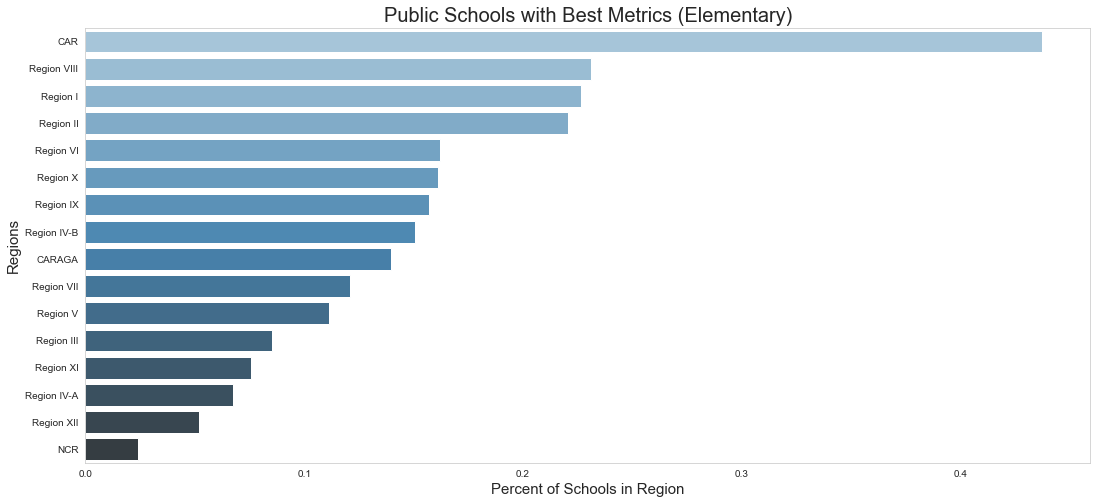

In [180]:
# indicates if plotting on the figues or on subplots
plt.figure(figsize=(18,8)) ## size of the figure

# the main code to create the graph
sns.barplot(x=df_best_ratios[1], y=df_best_ratios[0],
            data=df_best_ratios, palette = 'Blues_d')

# additional elements that can be customzed
plt.title("Public Schools with Best Metrics (Elementary)", fontsize=20)
plt.ylabel("Regions", fontsize=15)
plt.xlabel("Percent of Schools in Region", fontsize=15)

# display graph
plt.show()

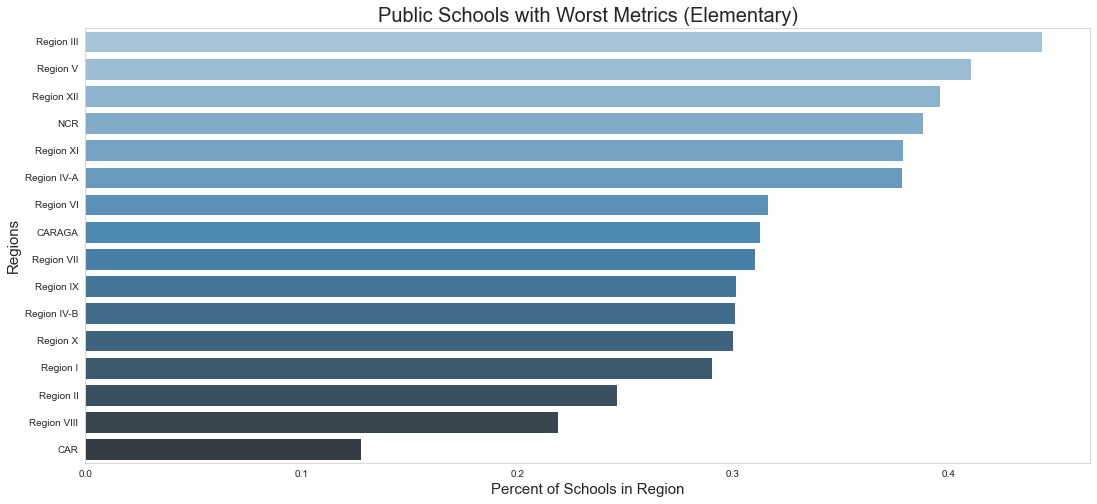

In [181]:
# indicates if plotting on the figues or on subplots
plt.figure(figsize=(18,8)) ## size of the figure

# the main code to create the graph
sns.barplot(x=df_worst_ratios[1], y=df_worst_ratios[0],
            data=df_worst_ratios, palette = 'Blues_d')

# additional elements that can be customzed
plt.title("Public Schools with Worst Metrics (Elementary)", fontsize=20)
plt.ylabel("Regions", fontsize=15)
plt.xlabel("Percent of Schools in Region", fontsize=15)

# display graph
plt.show()

Recommendations
1. Take a look at the reasons for schools being in the best and worst metric group (overpopulation in the area, school density, funding in the region in comparison to it's population)
2. Take a look at how metric groups affect NAT scores (how do the metrics affect nat scores - do low metric schools have low nat scores?)
3. 

## Hierachical Clustering

In [ ]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [ ]:
# mergings1 = linkage(df_elementary_kmeans_scaled, method="single", metric='euclidean')

# dendrogram(mergings1, p=10, truncate_mode="level", leaf_rotation=90)
# plt.show()

In [ ]:
# cluster_labels_h1 = cut_tree(mergings1, n_clusters=4).reshape(-1, )

# df_elementary_kmeans_h1 = df_elementary_kmeans

# df_elementary_kmeans_h1['Cluster_Labels'] = cluster_labels_h1
# df_elementary_kmeans_h1['Cluster_Labels'].value_counts()

In [ ]:
# mergings2 = linkage(df_elementary_kmeans_scaled, method="complete", metric='euclidean')

# dendrogram(mergings2, p=10, truncate_mode="level", leaf_rotation=90)
# plt.show()

In [ ]:
# mergings3 = linkage(df_elementary_kmeans_scaled, method="average", metric='euclidean')

# dendrogram(mergings3, p=10, truncate_mode="level", leaf_rotation=90)
# plt.show()

In [ ]:
# mergings4 = linkage(df_elementary_kmeans_scaled, method="centroid", metric='euclidean')

# dendrogram(mergings4, p=10, truncate_mode="level", leaf_rotation=90)
# plt.show()

## Secondary Data

In [71]:
# df_secondary_kmeans.head()

,ST Ratio,Students per Room Ratio,MOOE per Student Ratio
300001,16.857143,0.033898,1966.101695
300002,29.378788,0.022176,948.427024
300003,21.137931,0.029364,1143.556281
300004,30.333333,0.030220,1208.791209
300005,10.080000,0.027778,1573.412698


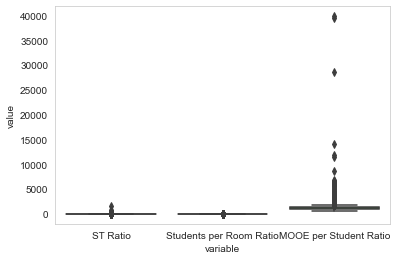

In [72]:
# melted = df_secondary_kmeans.melt()

# sns.boxplot(melted.variable, melted.value)

In [74]:
# #Remove MOOE outliers

# Q1 = df_secondary_kmeans['MOOE per Student Ratio'].quantile(0.25)
# Q3 = df_secondary_kmeans['MOOE per Student Ratio'].quantile(0.75)
# IQR = Q3 - Q1
# df_secondary_kmeans = (df_secondary_kmeans[(df_secondary_kmeans['MOOE per Student Ratio'] >= Q1 - 1.5*IQR) & 
#                            (df_secondary_kmeans['MOOE per Student Ratio'] <= Q3 + 1.5*IQR)])

In [75]:
# #Remove ST Ratio outliers
# Q1 = df_secondary_kmeans['ST Ratio'].quantile(0.25)
# Q3 = df_secondary_kmeans['ST Ratio'].quantile(0.75)
# IQR = Q3 - Q1
# df_secondary_kmeans = (df_secondary_kmeans[(df_secondary_kmeans['ST Ratio'] >= Q1 - 1.5*IQR) & 
#                            (df_secondary_kmeans['ST Ratio'] <= Q3 + 1.5*IQR)])

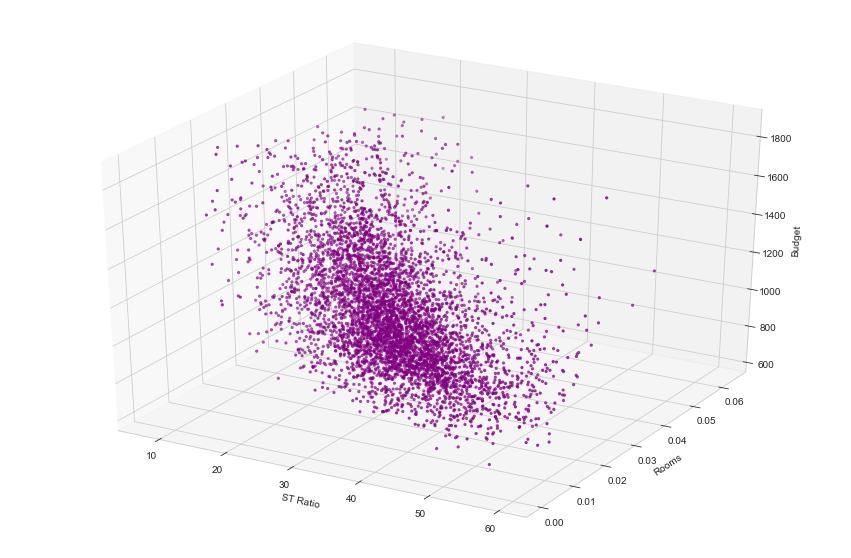

In [76]:
# sns.set_style("whitegrid", {'axes.grid' : False})

# fig = plt.figure(figsize=(15, 10))
# ax = fig.add_subplot(111, projection='3d')

# ST_Ratio = df_secondary_kmeans['ST Ratio']
# Rooms = df_secondary_kmeans['Students per Room Ratio']
# Budget = df_secondary_kmeans['MOOE per Student Ratio']
# ax.scatter(ST_Ratio, Rooms, Budget, s=5,c='purple')

# ax.set_xlabel('ST Ratio')
# ax.set_ylabel('Rooms')
# ax.set_zlabel('Budget')

# plt.show()

In [77]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# df_secondary_kmeans_scaled = scaler.fit_transform(df_secondary_kmeans)

In [78]:
# print(df_secondary_kmeans_scaled.min())
# print(df_secondary_kmeans_scaled.max())

-3.0189906660895094
6.393892820991233


## K-Means 

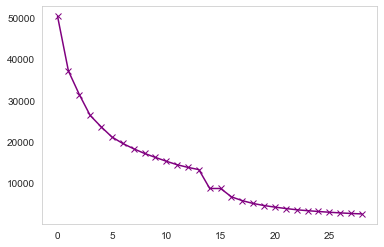

In [96]:
# from sklearn.cluster import KMeans

# ssd_secondary = []
# db_secondary = {}

# range_n_clusters = list(np.arange(2,16))

# for num_clusters in range_n_clusters:
#     kmeans = KMeans(n_clusters=num_clusters)
#     kmeans.fit(df_secondary_kmeans_scaled)
    
#     ssd_secondary.append(kmeans.inertia_)
#     db_secondary[num_clusters] = davies_bouldin_score(df_secondary_kmeans_scaled,kmeans.labels_)
    
# # plot the SSDs for each n_clusters
# plt.plot(ssd,'bx-',c='purple')

In [97]:
# kmeans = KMeans(n_clusters=3, random_state=42)
# kmeans.fit(df_secondary_kmeans_scaled)
# cluster_labels = kmeans.predict(df_secondary_kmeans_scaled)   

# df_secondary_kmeans['Cluster_Labels'] = cluster_labels
# df_secondary_kmeans['Cluster_Labels'].value_counts()

1    2297
2    1847
0    1106
Name: Cluster_Labels, dtype: int64

In [98]:
# from kneed import *

# #k-means elbow
# k1 = KneeLocator(range(2,16), ssd_secondary, curve='convex', direction='decreasing')
# k1.elbow

6

In [99]:
# print(list(db_secondary.keys())[list(db_secondary.values()).index(min(db_secondary.values()))])

2


## Silhouette Score 

In [100]:
# from sklearn.metrics import silhouette_score
# from sklearn.metrics import silhouette_samples
# range_n_clusters = list(np.arange(2,9))

# for num_clusters in range_n_clusters:
    
#     # intialise kmeans
#     kmeans = KMeans(n_clusters=num_clusters, random_state=42)
#     kmeans.fit(df_secondary_kmeans_scaled)
    
#     cluster_labels = kmeans.predict(df_secondary_kmeans_scaled)
    
#     # silhouette score
#     silhouette_avg = silhouette_score(df_secondary_kmeans_scaled, cluster_labels)
#     print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.3914247143248547
For n_clusters=3, the silhouette score is 0.3003618348019043
For n_clusters=4, the silhouette score is 0.26200222678738044
For n_clusters=5, the silhouette score is 0.24612985239995647
For n_clusters=6, the silhouette score is 0.24472947681483856
For n_clusters=7, the silhouette score is 0.25683447237064483
For n_clusters=8, the silhouette score is 0.23743479439655277


In [103]:
# df_secondary_kmeans.columns

Index(['ST Ratio', 'Students per Room Ratio', 'MOOE per Student Ratio',
       'Cluster_Labels'],
      dtype='object')

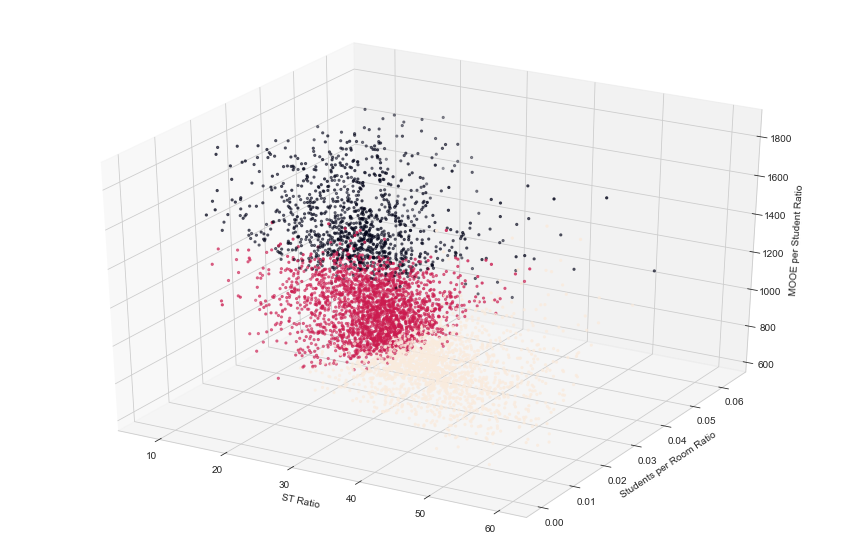

In [105]:
# sns.set_style("whitegrid", {'axes.grid' : False})

# fig = plt.figure(figsize=(15, 10))
# ax = fig.add_subplot(111, projection='3d')

# ST_Ratio = df_secondary_kmeans['ST Ratio']
# Rooms = df_secondary_kmeans['Students per Room Ratio']
# Budget = df_secondary_kmeans['MOOE per Student Ratio']
# Cluster = df_secondary_kmeans['Cluster_Labels']
# ax.scatter(ST_Ratio, Rooms, Budget, s=5, c = Cluster)

# ax.set_xlabel('ST Ratio')
# ax.set_ylabel('Students per Room Ratio')
# ax.set_zlabel('MOOE per Student Ratio')

# plt.show()

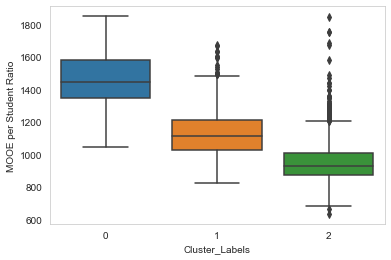

In [106]:
# sns.boxplot(x=df_secondary_kmeans.Cluster_Labels, y=df_secondary_kmeans["MOOE per Student Ratio"])

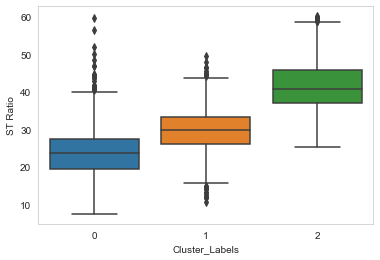

In [108]:
# sns.boxplot(x=df_secondary_kmeans.Cluster_Labels, y=df_secondary_kmeans["ST Ratio"])

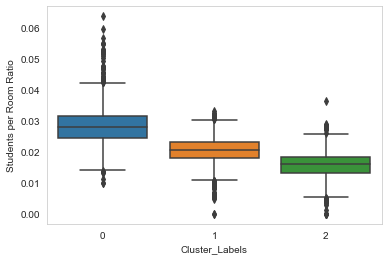

In [107]:
# sns.boxplot(x=df_secondary_kmeans.Cluster_Labels, y=df_secondary_kmeans["Students per Room Ratio"])

In [109]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# df_minmax = scaler.fit_transform(df_secondary_kmeans)

# df_minmax = pd.DataFrame(df_minmax, index=df_secondary_kmeans.index, columns=df_secondary_kmeans.columns)

# # df_minmax['Cluster_Labels'] = cluster_labels

# df_clusters = df_minmax.set_index("Cluster_Labels")
# df_clusters = df_clusters.groupby("Cluster_Labels").mean().reset_index()
# df_clusters

,Cluster_Labels,ST Ratio,Students per Room Ratio,MOOE per Student Ratio
0,0.0,0.311105,0.449830,0.686923
1,0.5,0.421109,0.320259,0.405100
2,1.0,0.649412,0.244008,0.259644


In [110]:
# from math import pi
# def make_spider( row, title, color):
 
#     # number of variable
#     categories=list(df_clusters)[1:]
#     N = len(categories)
 
#     # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
#     angles = [n / float(N) * 2 * pi for n in range(N)]
#     angles += angles[:1]
 
#     # Initialise the spider plot
#     ax = plt.subplot(3,3,row+1, polar=True )
 
#     # If you want the first axis to be on top:
#     ax.set_theta_offset(pi / 3.5)
#     ax.set_theta_direction(-1)
    
#     # Draw one axe per variable + add labels labels yet
#     plt.xticks(angles[:-1], categories, color='grey', size=8)
 
#     # Draw ylabels
#     ax.set_rlabel_position(0)
# #     plt.yticks([-2, -1, 0, 1, 2], [-2,-1, 0, 1, 2], color="grey", size=7) #for sscaled
# #     plt.ylim(-2.5,2.5)
#     plt.yticks([-0.25, 0, 0.25, 0.5, 0.75, 1], [-0.25, 0, 0.25, 0.5,0.75, 1], color="grey", size=7) #formmscaled
#     plt.ylim(-0.25,1)

#     # Ind1
#     values=df_clusters.loc[row].drop('Cluster_Labels').values.flatten().tolist()
#     values += values[:1]
#     ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
#     ax.fill(angles, values, color=color, alpha=0.4)
 
#     # Add a title
#     plt.title(title, size=14, color=color, y=1.1)

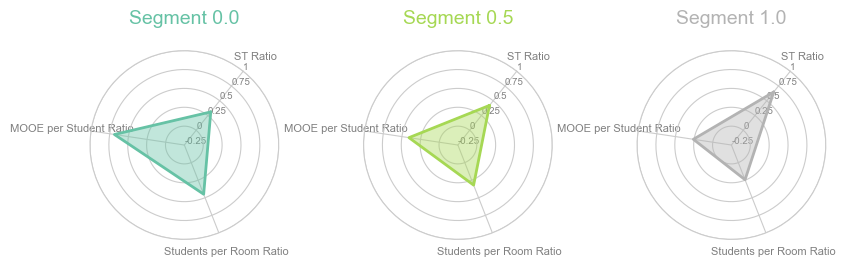

In [111]:
# my_dpi=100
# plt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)
# plt.subplots_adjust(hspace=0.5)

# # Create a color palette:
# my_palette = plt.cm.get_cmap("Set2", len(df_clusters.index))

# for row in range(0, len(df_clusters.index)):
#     make_spider(row=row, 
#                 title='Segment '+(df_clusters['Cluster_Labels'][row]).astype(str), 
#                 color=my_palette(row))

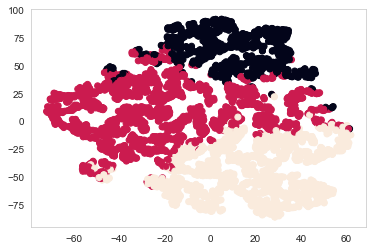

In [112]:
# # t-SNE visualization of grain dataset

# # Import TSNE
# from sklearn.manifold import TSNE

# variety_numbers = list(df_secondary_kmeans.iloc[:,-1])

# # Create a TSNE instance: model
# model = TSNE(learning_rate=300, perplexity=30)

# # Apply fit_transform to samples: tsne_features
# tsne_features = model.fit_transform(df_secondary_kmeans_scaled)

# # Select the 0th feature: xs
# xs = tsne_features[:,0]

# # Select the 1st feature: ys
# ys = tsne_features[:,1]

# # Scatter plot, coloring by variety_numbers
# plt.scatter(xs,ys,c=variety_numbers)
# plt.show()

# Hierarchical Clustering

## Secondary 

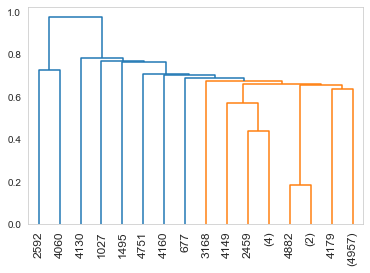

In [104]:
# mergings_s1 = linkage(df_secondary_kmeans_scaled, method="single", metric='euclidean')

# dendrogram(mergings5_s1 p=10, truncate_mode="level", leaf_rotation=90)
# plt.show()

In [ ]:
# cluster_labels_hs1 = cut_tree(mergings5, n_clusters=3).reshape(-1, )

# df_secondary_kmeans_hs1 = df_secondary_kmeans

# df_secondary_kmeans_hs1['Cluster_Labels'] = cluster_labels
# df_secondary_kmeans_hs1['Cluster_Labels'].value_counts()

In [ ]:
# mergings_s2 = linkage(df_secondary_kmeans_scaled, method="complete", metric='euclidean')

# dendrogram(mergings_s2, p=10, truncate_mode="level", leaf_rotation=90)
# plt.show()

In [ ]:
# mergings_s3 = linkage(df_secondary_kmeans_scaled, method="average", metric='euclidean')

# dendrogram(mergings_s3, p=10, truncate_mode="level", leaf_rotation=90)
# plt.show()

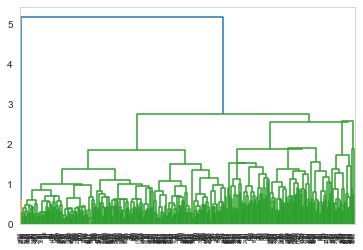

In [103]:
# mergings_s4 = linkage(df_secondary_kmeans_scaled, method="centroid", metric='euclidean')

# dendrogram(mergings_s4, p=10, truncate_mode="level", leaf_rotation=90)
# plt.show()